In [2]:
# start 칼럼의 분포 및 이상치 여부를 탐색하는 boxplot 및 이상치를 구하세요
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
columns = ['Date','Close','Start','High','Low','Volume']
df.drop('전일종가',axis=1,inplace = True)
df.columns = columns
df['Date']=pd.to_datetime(df.Date)
df.set_index('Date',inplace = True)
df.head()

,Close,Start,High,Low,Volume
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

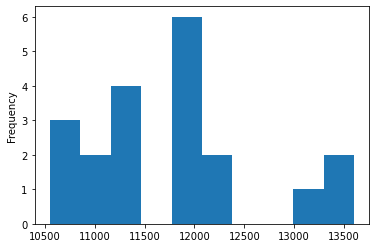

In [4]:
df.Start.plot(kind='hist')

<AxesSubplot:>

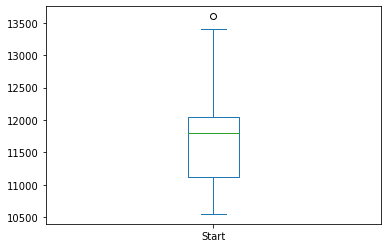

In [5]:
df.Start.plot(kind='box')

In [6]:
q1 = df.Start.quantile(.25)
q3 = df.Start.quantile(.75)
irq = q3-q1
df.Start.sort_values(ascending = False)
df.Start.loc[(df.Start>q3 +1.5*irq)|(df.Start<q1 -1.5*irq)]

Date
2018-06-15    13600
Name: Start, dtype: int64

df_ep 데이터프레임으로 다음을 수행하세요
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- boxplot

,south,north
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


<AxesSubplot:xlabel='year'>

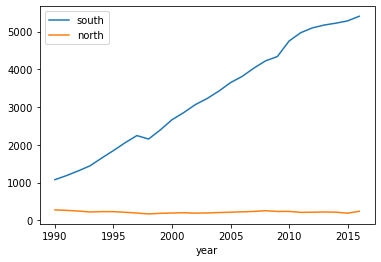

In [17]:
df = pd.read_excel('./dataset/df_ep.xlsx',engine = 'openpyxl')

df.set_index('year',inplace = True)

display(df.head())
display(df.plot())





<AxesSubplot:xlabel='year'>

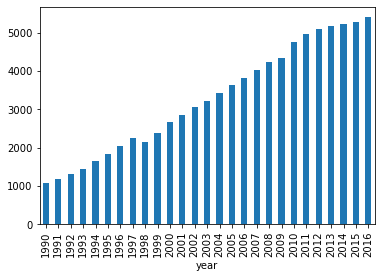

In [18]:
display(df.south.plot(kind = 'bar'))

<AxesSubplot:ylabel='Frequency'>

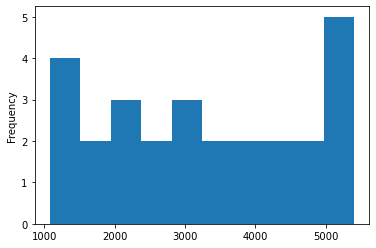

In [19]:
display(df.south.plot(kind = 'hist'))

<AxesSubplot:>

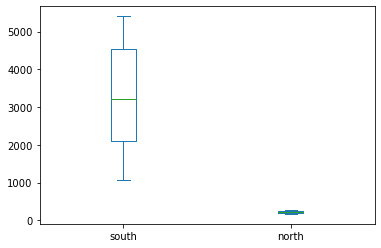

In [20]:
display(df.plot(kind = 'box'))

In [22]:
# df_auto의 각 칼럼을 시각화 해서 탐색한 후 인사이트를 기술하세요(5개 이상)
df1 = pd.read_excel('./dataset/auto-mpg.xlsx',engine = 'openpyxl')
print(len(df1))
df1.head()

398


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
df1.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [30]:
# df1 = horsepower의 ?값 제거 버전

df1.loc[df1['horsepower'] == '?',['horsepower']] = np.nan
df1.loc[df1['horsepower'].isnull(),['horsepower']].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [31]:
df1.drop(df1.loc[df1['horsepower'].isnull(),['horsepower']].index, axis = 0,inplace = True)

In [35]:
df1.horsepower=df1.horsepower.astype(int)

In [36]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

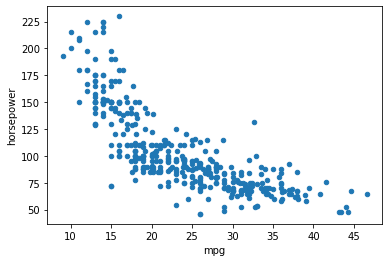

In [37]:
df1.plot(x='mpg',y='horsepower',kind = 'scatter')

인사이트 1 : nan 값을 제거한 horsepower(마력)과 mpg(연비)는 서로 음의 상관관계를 가지는 것으로 보인다

In [38]:
# df2 : horsepower의 nan값이 삭제되지 않은 버전
df2 = pd.read_excel('./dataset/auto-mpg.xlsx',engine = 'openpyxl')
df2.value_counts('cylinders')

cylinders
4    204
8    103
6     84
3      4
5      3
dtype: int64

<AxesSubplot:xlabel='acceleration', ylabel='horsepower'>

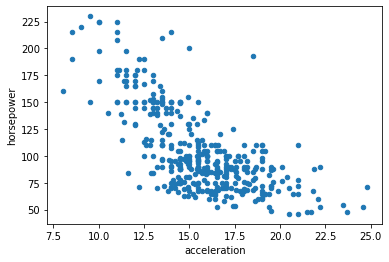

In [39]:
df1.plot(x='acceleration',y='horsepower',kind = 'scatter')

인사이트 2 : acceleration(가속력)과 horsepower(마력)은 음의 상관관계를 가지는 것으로 보인다

<AxesSubplot:xlabel='weight', ylabel='mpg'>

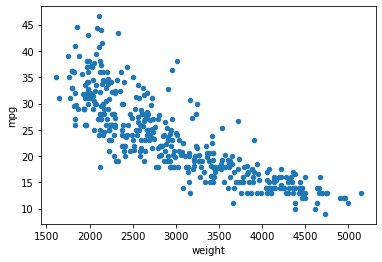

In [40]:
df2.plot(x='weight',y='mpg',kind = 'scatter')

인사이트 3 : weight(차량 무게)와 mpg(연비)는 음의 상관관계를 가지는 것으로 보인다

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

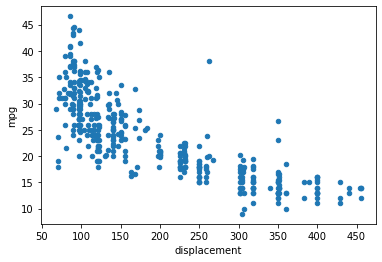

In [41]:
df2.plot(x='displacement',y='mpg',kind = 'scatter')

인사이트4 : displacement(배기량)와 mpg(연비)는 음의 상관관계를 가지는 것으로 보인다

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

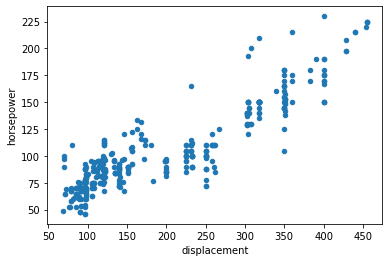

In [42]:
df1.plot(x='displacement',y='horsepower',kind = 'scatter')

인사이트 5 : displacement(배기량)과 horsepower(마력)는 양의 상관관계를 가지는 것으로 보인다

히스토그램, 선, 막대 ,산점도 그래프 4개를 subplot으로 출력하세요

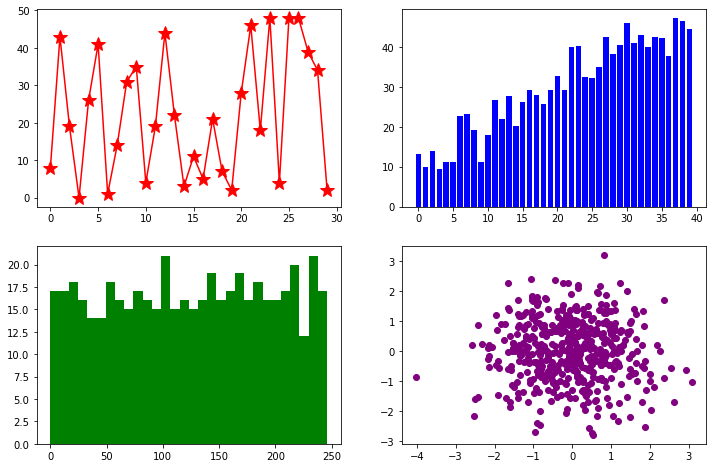

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
#figure가 2x2 크기이고 4개의 subplot

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(np.arange(30),np.random.randint(0,50,size = 30),color = 'red',marker = '*',markersize = 15)
ax2.bar(np.arange(40),np.arange(10,50)+4*np.random.randn(40),color='blue')
ax3.hist(np.random.rand(500).cumsum(),bins = 30,color = 'green')
ax4.scatter(np.random.randn(500),np.random.randn(500),color = 'purple')